#### The dataset is in the following directory structure

- `train/<class>/<image-name>.jpg`
- `test/<class>/<image-name>.jpg`

In [ ]:
import os
kaggle_data={"username":"avantidasre","key":"a5d86f6dae2cc44ba9797151b4d9f6ee""}
os.environ['KAGGLE_USERNAME']=kaggle_data["username"]
os.environ['KAGGLE_KEY']=kaggle_data["key"]

In [ ]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

 99% 104M/105M [00:04<00:00, 27.1MB/s] 
100% 105M/105M [00:04<00:00, 25.7MB/s]


In [ ]:
!unzip cifake-real-and-ai-generated-synthetic-images.zip -d cifake-real-and-ai-generated-synthetic-images

Streaming output truncated to the last 5000 lines.
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (10).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (2).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (3).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (4).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (5).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (6).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (7).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (8).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (9).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500.jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4501 (10).jpg  
  inflating: cif

In [ ]:
import numpy as np
import pandas as pd
import os

train_dir = "cifake-real-and-ai-generated-synthetic-images/train"
test_dir = "cifake-real-and-ai-generated-synthetic-images/test"

In [ ]:
def get_image_details(folder):

    data = []
    classes = os.listdir(train_dir)
    for class_name in classes:
        class_dir = os.path.join(train_dir, class_name)
        images = os.listdir(class_dir)
        for img in images:
            img_path = f"{class_dir}/{img}"
            data.append([img, class_name, img_path])

    data_df = pd.DataFrame(data, columns=['image_name', 'label', 'image_path'])
    print(f"{len(data_df)} total images found..." )

    return data_df

In [ ]:
import matplotlib.pyplot as plt
def show_sample_images(df):

    n_samples = 15
    sample_df = df.sample(n_samples)

    img_paths = sample_df['image_path'].values
    img_classes = sample_df['label'].values

    plt.figure(figsize= (4,4))
    for i in range(0, n_samples):
        # create a subplot grid
        plt.subplot(3, 5, i + 1)
        img = plt.imread(img_paths[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_classes[i])

    plt.show()

#### Training Data

In [ ]:
train_data = get_image_details(train_dir)
train_data[['image_name', 'label']].head()

100000 total images found...


,image_name,label
0,5831 (10).jpg,FAKE
1,4398 (10).jpg,FAKE
2,2722 (4).jpg,FAKE
3,3009 (2).jpg,FAKE
4,3176 (8).jpg,FAKE


In [ ]:
train_data['label'].value_counts()

FAKE    50000
REAL    50000
Name: label, dtype: int64

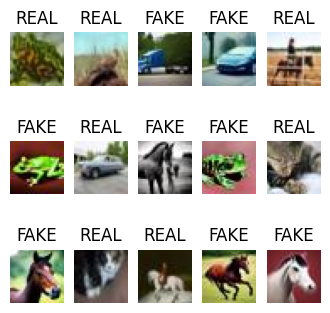

In [ ]:
show_sample_images(train_data)

#### Test data

In [ ]:
test_data = get_image_details(test_dir)

100000 total images found...


In [ ]:
test_data['label'].value_counts()

FAKE    50000
REAL    50000
Name: label, dtype: int64

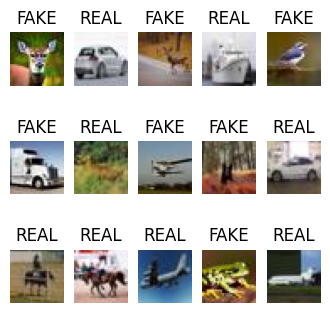

In [ ]:
show_sample_images(test_data)

Data Preparation

In [ ]:
import cv2
X_train = []
y_train = []
for img in os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/train/REAL'):
  X_train.append(cv2.imread(f'/content/cifake-real-and-ai-generated-synthetic-images/train/REAL/{img}'))
  y_train.append(1)

for img in os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/train/FAKE'):
  X_train.append(cv2.imread(f'/content/cifake-real-and-ai-generated-synthetic-images/train/FAKE/{img}'))
  y_train.append(0)

In [ ]:
X_test = []
y_test = []
for img in os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/test/REAL'):
  X_test.append(cv2.imread(f'/content/cifake-real-and-ai-generated-synthetic-images/test/REAL/{img}'))
  y_test.append(1)
for img in os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/test/FAKE'):
  X_test.append(cv2.imread(f'/content/cifake-real-and-ai-generated-synthetic-images/test/FAKE/{img}'))
  y_test.append(0)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(100000, 32, 32, 3)

In [ ]:
X_test.shape

(20000, 32, 32, 3)

Model Building

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
from matplotlib import pyplot as plt
def plot_history(history):
  y = history.history['accuracy']
  x = list(range(1,len(y)+1))
  plt.plot(x,y)
  y = history.history['val_accuracy']
  x = list(range(1,len(y)+1))
  plt.plot(x,y)
  plt.show()

Architecture 1

In [ ]:
def make_model_1(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation= "sigmoid")(x)
    return keras.Model(inputs, outputs)

In [ ]:
model = make_model_1(X_train.shape[1:],2)
model.compile(optimizer='adam',loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,y_train,
    epochs=50,
    validation_split=0.3
)


Epoch 1/50
2188/2188 [==============================] - 29s 6ms/step - loss: 0.5342 - accuracy: 0.7422 - val_loss: 0.5326 - val_accuracy: 0.7093
Epoch 2/50
2188/2188 [==============================] - 11s 5ms/step - loss: 0.4992 - accuracy: 0.7653 - val_loss: 1.0952 - val_accuracy: 0.2528
Epoch 3/50
2188/2188 [==============================] - 12s 5ms/step - loss: 0.4691 - accuracy: 0.7805 - val_loss: 0.4403 - val_accuracy: 0.7728
Epoch 4/50
2188/2188 [==============================] - 11s 5ms/step - loss: 0.4403 - accuracy: 0.7951 - val_loss: 0.6660 - val_accuracy: 0.5768
Epoch 5/50
2188/2188 [==============================] - 11s 5ms/step - loss: 0.4221 - accuracy: 0.8048 - val_loss: 0.6915 - val_accuracy: 0.5622
Epoch 6/50
2188/2188 [==============================] - 12s 5ms/step - loss: 0.4062 - accuracy: 0.8142 - val_loss: 0.7932 - val_accuracy: 0.5255
Epoch 7/50
2188/2188 [==============================] - 12s 6ms/step - loss: 0.3953 - accuracy: 0.8225 - val_loss: 0.5760 - val_ac

In [ ]:
model.save('model1.keras')

In [ ]:
history_df = pd.DataFrame(history.history)

# Save the DataFrame to an Excel file
excel_filename = "Log_Training_Architecture1.xlsx"
history_df.to_excel(excel_filename, index=False)

print(f"Training history saved to {excel_filename}")

Training history saved to Log_Training_Architecture1.xlsx


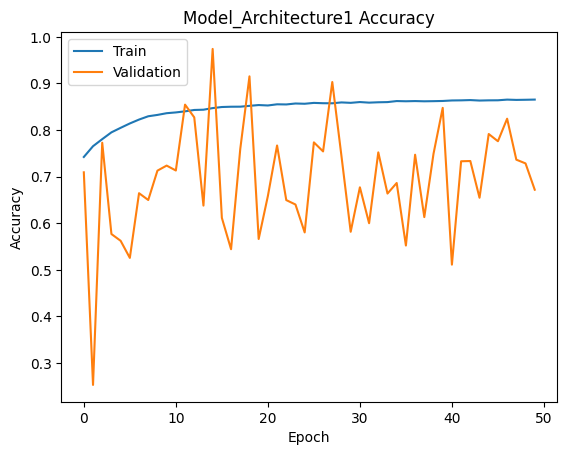

In [ ]:
#Plotting Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Architecture1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("ACC_Architecture1.png")
plt.show()

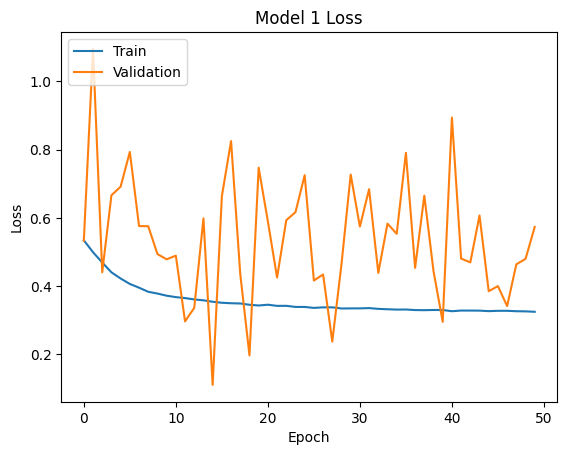

In [ ]:
#Loss Graph
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Loss_Architecture_1.png")
plt.show()

625/625 [==============================] - 2s 3ms/step


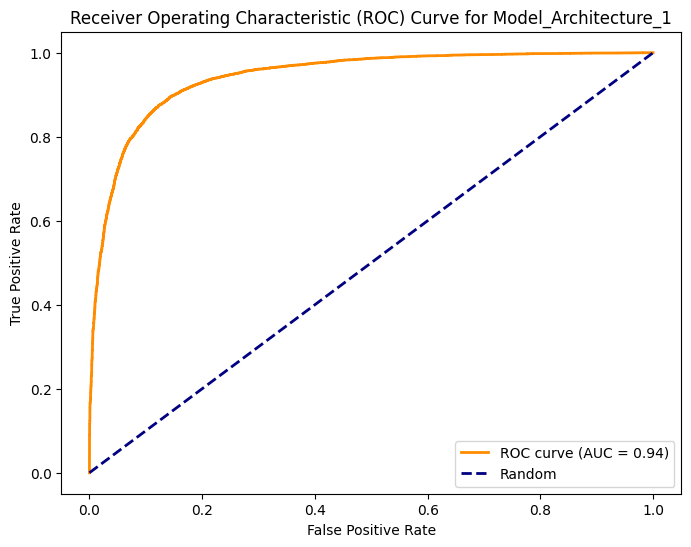

In [ ]:
# Predict probabilities on the test set
y_prob = model.predict(X_test)
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Model_Architecture_1')
plt.legend()
plt.savefig("ROC_Architecture_1.png")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

625/625 [==============================] - 1s 2ms/step


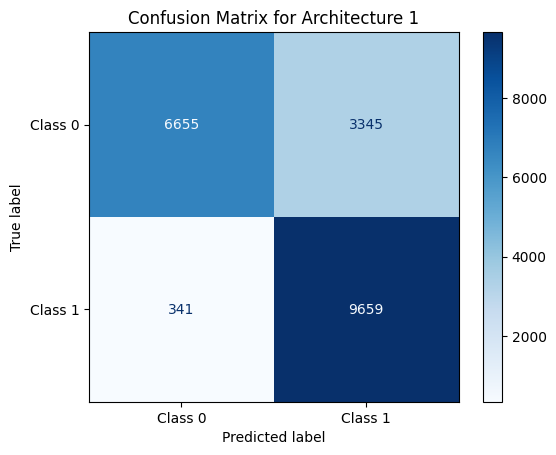

In [ ]:
# Predict binary labels on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues, values_format='.4g')
plt.title('Confusion Matrix for Architecture 1')
plt.savefig("CM_Architecture_1.png")
plt.show()

In [ ]:
plot_history(history)

Architecture 2

In [ ]:
def make_model_2(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    x = layers.Activation("relu")(x)
    x = layers.Conv2D(256, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(128, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(16, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation= "sigmoid")(x)
    return keras.Model(inputs, outputs)

Epoch 1/50
2500/2500 [==============================] - 28s 10ms/step - loss: 0.3978 - accuracy: 0.8227 - val_loss: 1.4980 - val_accuracy: 0.4904
Epoch 2/50
2500/2500 [==============================] - 21s 8ms/step - loss: 0.2940 - accuracy: 0.8807 - val_loss: 1.1184 - val_accuracy: 0.4866
Epoch 3/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.2621 - accuracy: 0.8949 - val_loss: 1.1720 - val_accuracy: 0.5076
Epoch 4/50
2500/2500 [==============================] - 21s 9ms/step - loss: 0.2416 - accuracy: 0.9056 - val_loss: 0.5031 - val_accuracy: 0.7728
Epoch 5/50
2500/2500 [==============================] - 21s 9ms/step - loss: 0.2318 - accuracy: 0.9101 - val_loss: 0.3398 - val_accuracy: 0.8372
Epoch 6/50
2500/2500 [==============================] - 26s 10ms/step - loss: 0.2208 - accuracy: 0.9143 - val_loss: 0.1153 - val_accuracy: 0.9561
Epoch 7/50
2500/2500 [==============================] - 22s 9ms/step - loss: 0.2105 - accuracy: 0.9187 - val_loss: 0.0836 - val_

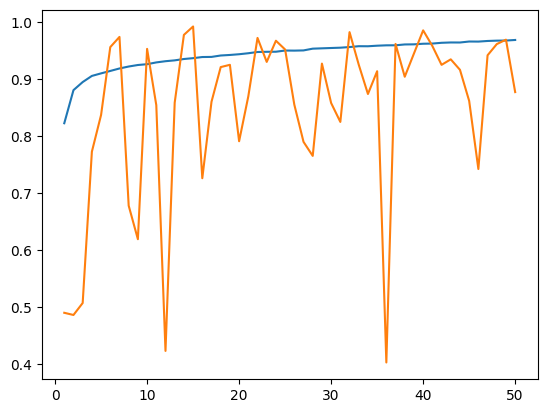

In [ ]:
model = make_model_2(X_train.shape[1:],2)
model.compile(optimizer='adam',loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,y_train,
    epochs=50,
    validation_split=0.2
)
plot_history(history)

Training history saved to Log_Training_Architecture2.xlsx


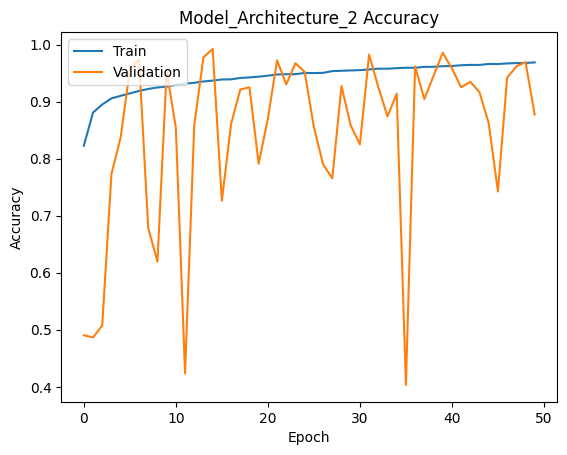

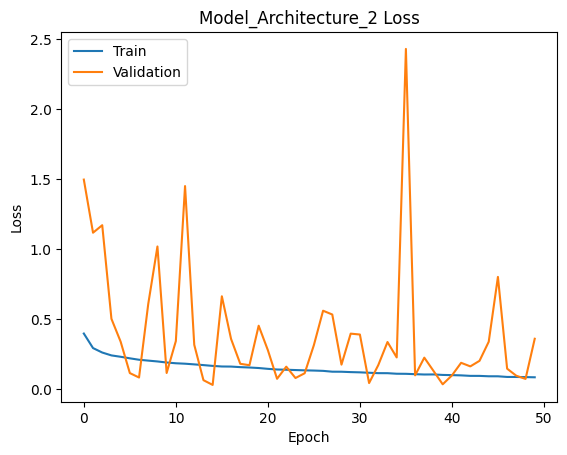

In [ ]:
history_df = pd.DataFrame(history.history)

# Save the DataFrame to an Excel file
excel_filename = "Log_Training_Architecture2.xlsx"
history_df.to_excel(excel_filename, index=False)

print(f"Training history saved to {excel_filename}")
#Plotting Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Architecture_2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("ACC_Architecture2.png")
plt.show()
#Loss Graph
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Architecture_2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Loss_Architecture_2.png")
plt.show()

625/625 [==============================] - 2s 3ms/step


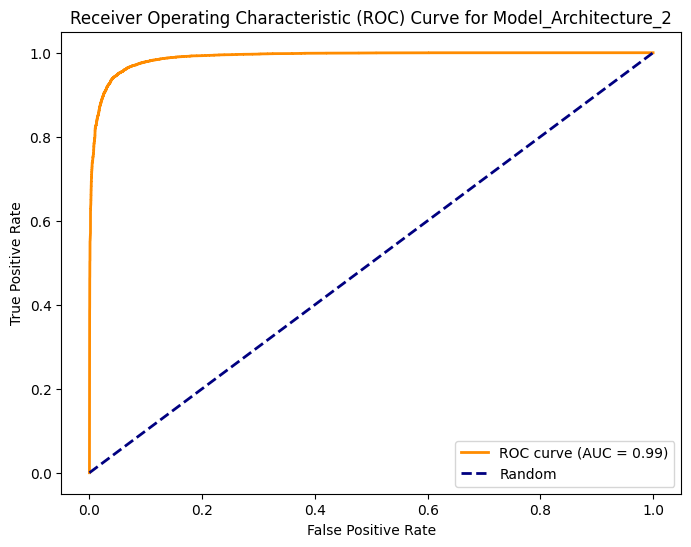

In [ ]:
# Predict probabilities on the test set
y_prob = model.predict(X_test)
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Model_Architecture_2')
plt.legend()
plt.savefig("ROC_Architecture_2.png")
plt.show()

625/625 [==============================] - 2s 4ms/step


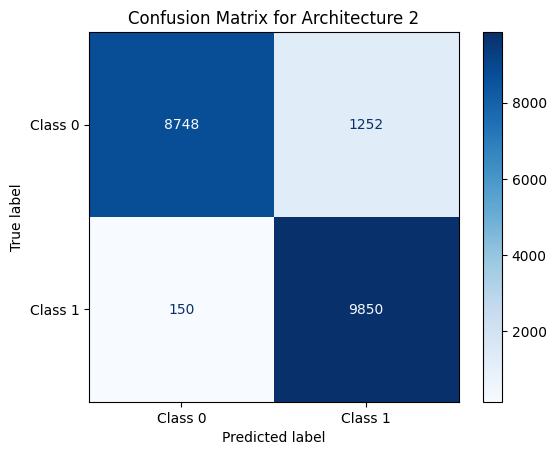

In [ ]:
# Predict binary labels on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues, values_format='.4g')
plt.title('Confusion Matrix for Architecture 2')
plt.savefig("CM_Architecture_2.png")
plt.show()

# resnet

In [ ]:
imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=X_train.shape[1:],
pooling='avg',classes=1,
weights='imagenet')
for layer in imported_model.layers:
  layer.trainable=False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet = models.Sequential()
resnet.add(imported_model)
resnet.add(layers.Flatten())
resnet.add(layers.Dense(512, activation='relu'))
resnet.add(layers.Dense(32, activation='relu'))
resnet.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
resnet.compile(optimizer='adam',loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
history_resnet = resnet.fit(
    X_train,y_train,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
2500/2500 [==============================] - 35s 14ms/step - loss: 0.2269 - accuracy: 0.9067 - val_loss: 0.3563 - val_accuracy: 0.8530
Epoch 2/50
2500/2500 [==============================] - 35s 14ms/step - loss: 0.1949 - accuracy: 0.9208 - val_loss: 0.3841 - val_accuracy: 0.8477
Epoch 3/50
2500/2500 [==============================] - 35s 14ms/step - loss: 0.1661 - accuracy: 0.9333 - val_loss: 0.3201 - val_accuracy: 0.8729
Epoch 4/50
2500/2500 [==============================] - 39s 16ms/step - loss: 0.1417 - accuracy: 0.9441 - val_loss: 0.4323 - val_accuracy: 0.8508
Epoch 5/50
2500/2500 [==============================] - 35s 14ms/step - loss: 0.1159 - accuracy: 0.9551 - val_loss: 0.2469 - val_accuracy: 0.9097
Epoch 6/50
2500/2500 [==============================] - 39s 16ms/step - loss: 0.1002 - accuracy: 0.9620 - val_loss: 0.5728 - val_accuracy: 0.8392
Epoch 7/50
2500/2500 [==============================] - 35s 14ms/step - loss: 0.0818 - accuracy: 0.9688 - val_loss: 0.4251 -

Training history saved to Log_Training_RESNET.xlsx


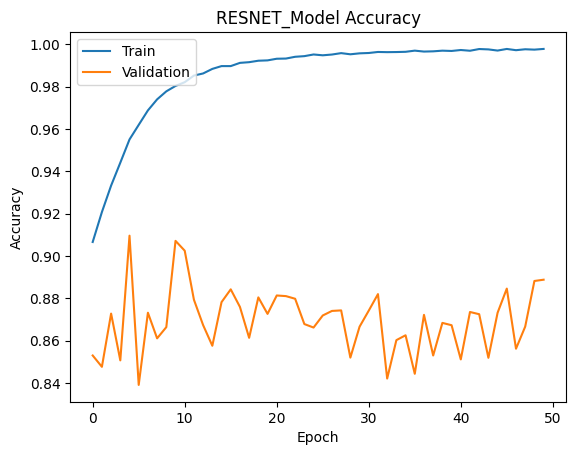

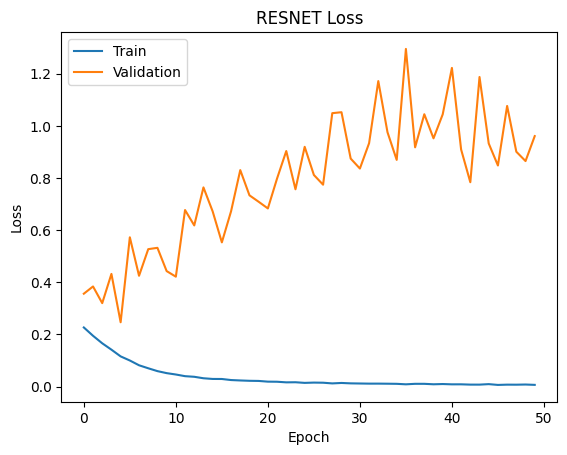

In [ ]:
history=history_resnet

history_df = pd.DataFrame(history.history)

# Save the DataFrame to an Excel file
excel_filename = "Log_Training_RESNET.xlsx"
history_df.to_excel(excel_filename, index=False)

print(f"Training history saved to {excel_filename}")
#Plotting Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RESNET_Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("ACC_RESNET.png")
plt.show()
#Loss Graph
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RESNET Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Loss_RESNET.png")
plt.show()

625/625 [==============================] - 7s 11ms/step


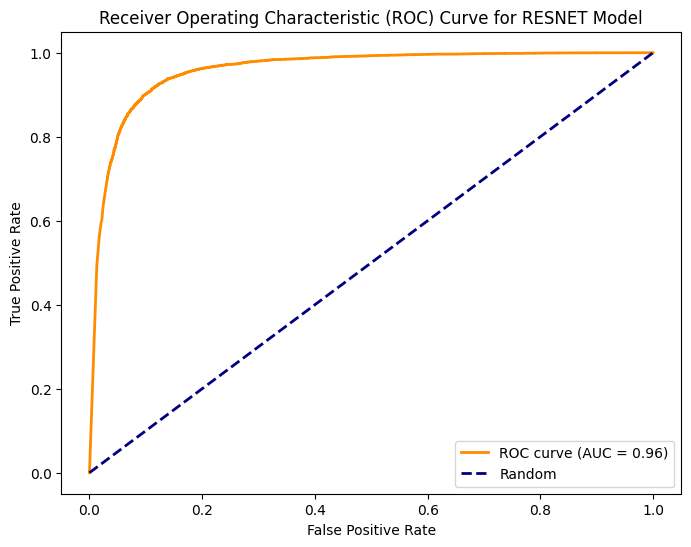

In [ ]:
# Predict probabilities on the test set
y_prob = resnet.predict(X_test)
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RESNET Model')
plt.legend()
plt.savefig("ROC_RESNET.png")
plt.show()

625/625 [==============================] - 10s 16ms/step


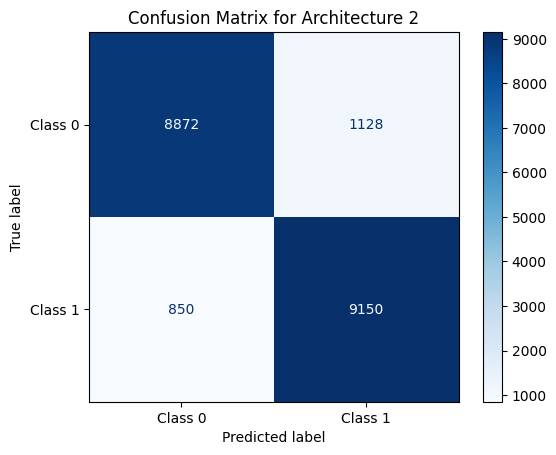

In [ ]:
# Predict binary labels on the test set
y_pred = (resnet.predict(X_test) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues, values_format='.4g')
plt.title('Confusion Matrix for Architecture 3')
plt.savefig("CM_RESNET.png")
plt.show()